SALES ANALYSIS USING PYTHON

In [40]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import datetime as dt


Reading Multiple files and then concatinating to one

In [41]:

all_months_data = pd.DataFrame()
files = [file for file in os.listdir(r"C:\Users\91735\sales")]
path = r'C:\Users\91735\sales'
for file in files:
    #print(file)
    df = pd.read_csv(path+'/'+file)
    all_months_data = pd.concat([all_months_data,df])    

In [42]:
all_data = pd.read_csv("all_data.csv")


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [43]:
#Data EDA
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [44]:
all_data.shape

(186850, 6)

In [45]:
type(all_data['Order Date'][0])

str

In [46]:
#Since it is a string we can extract the data using string methods or convert the data type into a timestamp or datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],errors = 'coerce')
all_data['Order Date'].isnull().nunique()
all_data['Order Date'].dropna(inplace = True)
all_data.dropna(inplace = True)
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [47]:
#To check the NaN values
df_nan = pd.DataFrame()
df_nan = all_data[all_data.isna().any(axis = 1)]
df_nan.count()
#so there are no null values

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [48]:
#Adding Month Column to the dataset
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [49]:
#Adding City Coulmn and adding state column
#to this we can take two approaches 
#Approach one:
def city(x):
    return x.split(',')[1]
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: city(x))
#Approach two:
'''all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)'''
#all_data.drop(['city'], axis = 1,inplace = True)
def get_state(x):
    y =  x.split(',')[2].split(' ')[1]
    y.lstrip()
    return y
all_data['City'] = all_data['Purchase Address'].apply(lambda x:city(x) + '(' + get_state(x) + ')')

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


In [50]:
#Adding a sales columns
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99


Best Month For Sales

In [51]:
#So wegroup it to months then sum up that month sales
''''by_month = all_data.groupby('Month')
by_month['Sales'].sum().sort_values(ascending = False)'''
#Now approach without making it an object
all_data.groupby('Month').sum().sort_values(by = 'Sales' ,ascending=False).head(1)

#The Best Month For Sales is December


,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34


City With The Highest Sales


In [52]:
bycity = all_data.groupby('City')
bycity[['Quantity Ordered','Sales']].sum().sort_values(by = 'Sales',ascending = False)


,Quantity Ordered,Sales
City,,
San Francisco(CA),50239,8262203.91
Los Angeles(CA),33289,5452570.80
New York City(NY),27932,4664317.43
Boston(MA),22528,3661642.01
Atlanta(GA),16602,2795498.58
Dallas(TX),16730,2767975.40
Seattle(WA),16553,2747755.48
Portland(OR),11303,1870732.34
Austin(TX),11153,1819581.75


Which will be the best time to put out advertisments?

In [ ]:
#What time should we advertise so it attracts the customers?
#So here we are making an hour column and we are trying to focus on the time frame the products were sold?
all_data['hour'] = all_data['Order Date'].dt.hour
byhour = all_data.groupby('hour')
byhour[['Quantity Ordered']].sum().sort_values(by = 'Quantity Ordered',ascending = False).head(5)
all_data.to_csv('Salesall.csv',index = False)

By this we can conclude that most of the items were ordered during  19 hours 

What was the most sold product?



In [54]:
byproduct = all_data.groupby('Product')
byproduct['Quantity Ordered'].sum().sort_values(ascending = False)


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9


In [56]:
#write to the master file
all_data.to_csv('Salesall.csv',index = False)

In [60]:
#making a date table out of this
datedf = pd.DataFrame()
datedf['Order ID'] = all_data['Order ID']
datedf['Order Date'] = all_data['Order Date']
datedf['Month'] = all_data['Month']
datedf.head()

#reading it to a CSV file
datedf.to_csv('salesdate.csv',index = False)

In [59]:
#Making a Product Table 
productdf = pd.DataFrame()
productdf['Order ID'] = all_data['Order ID']
productdf['Product'] = all_data['Product']
productdf.head()

#reading it to a CSV file
productdf.to_csv('salesproduct.csv',index = False)

Visualisation Done In PowerBI:


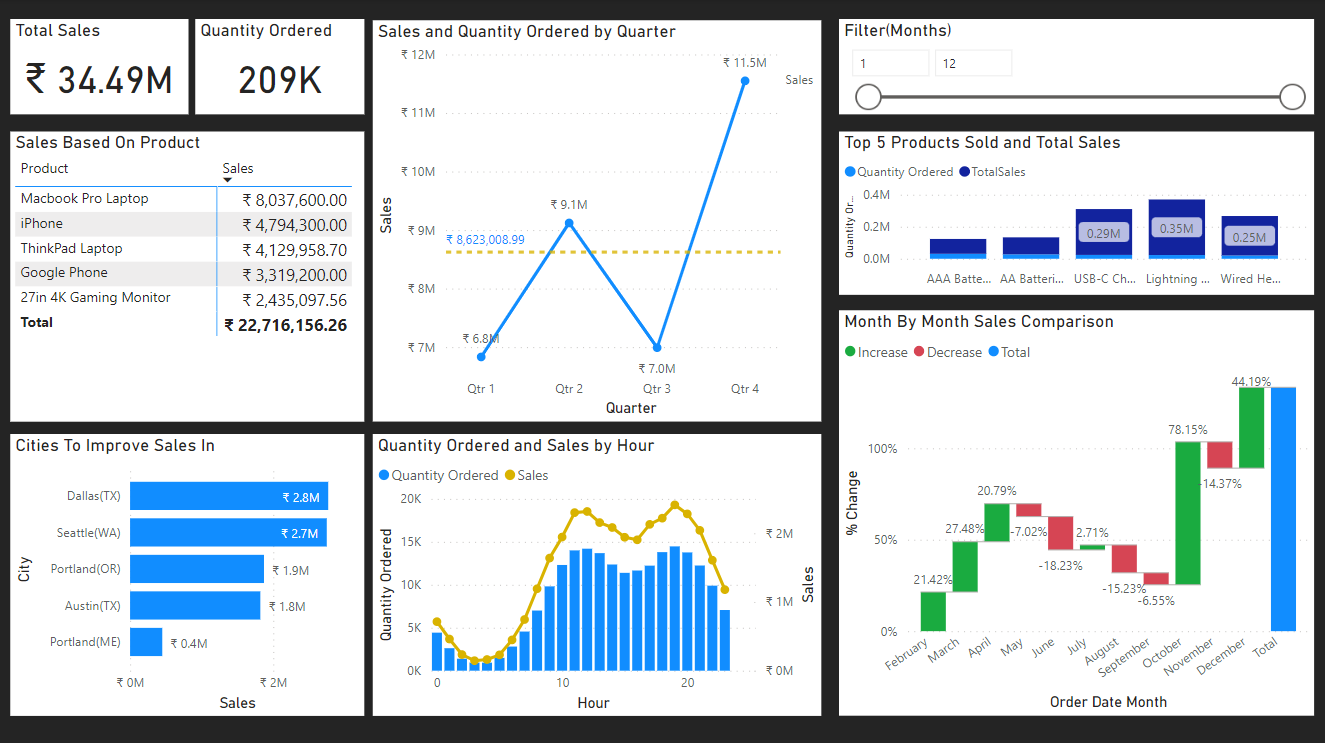

This is a data analysis of a Electronic Store Sales, from the dashboard I have built we will not only look at the total sales but we will also focus on where we can improve our sales:


1)We have a total sales of 34.49M, selling a total of 209K products.

2)We can see from the chart that Macbooks and iPhone have resulted in top in terms of total sales, also if we observe the chart of Top 5 Products sold we can see that USB-C Charging Cables and Lightning Charge Cable have been ordered a lot chart because of the recent change in approach by Apple to not provide chargers with the new iPhone's.

3)If we observe there is dip in sales start from the second quarter and falls below the average expected sales line in the third quarter the net fall is -44.32%, so this the period where we have to start offering discounts on certain products to our customers to maintain the sales throughout the year.

4)The best time to advertise our products is in the morning between 11:00 and 12:00 where 28205 products were sold, in the evening between 18:00 and 19:00 where 28272 products were sold, this the time where we have more number of users visiting us.

5)Top 5 Products Ordered chart shows that AAA Battries have been sold the most as it is a house hold product and also it will be bought very frequently because battries dry up fast.

6)Texas state is where we have to improve our ad campigning given that two cities have made it to the bottom 5 of our least sold products.